# Example usign dot splash

Hopefully this function will be part of a release of [numericalsgps](https://gap-packages.github.io/numericalsgps/), or not...  It translates a relation to a graph in [dot](http://www.graphviz.org/content/dot-language) language.

In [1]:
RelToDotNS:=function(uni, rel,labels)

  local r, output, out, i, str;

  str:=function(s)
    return Concatenation("\"",String(s),"\"");
  end;

  out:="";
  output:=OutputTextString(out,true);
  AppendTo(output,"graph  NSGraph{");
  for i in [1..Length(uni)] do
    AppendTo(output,i," [label=",str(labels[i]),"];");
  od;
  for r in rel do
    AppendTo(output,Position(uni,r[1])," -- ",Position(uni,r[2]),";");
  od;
  AppendTo(output,"}");
  CloseStream(output);
  return out;
end;

function( uni, rel, labels ) ... end

We do not want to draw all relations, so we purge reflexivity and transitiveness.

In [2]:
hasse:=function(dom,rel)
    local out;
    
    out:=Filtered(rel, p-> p[1]=p[2] or ForAny(Difference(dom,p), x->([p[1],x] in rel) and ([x,p[2]] in rel)));
    
    return Difference(rel,out);
end;

function( dom, rel ) ... end

## A first example: lattice of vector subspaces

Let us draw the lattice of vector subspaces of $\mathbb{Z}_5^2$.

First, we compute the set of subspaces of $\mathbb{Z}_5^2$.

In [3]:
sz:= Subspaces(GF(5)^2);

<object>

In [4]:
un:=List(sz);

[ <object>, <object>, <object>, <object>, <object>, <object>, <object>, <object> ]

In [5]:
rels:=Filtered(Cartesian(un,un),p->IsSubspace(p[1],p[2]));

[ [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ] ]

In [6]:
h:=hasse(un,rels);

[ [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ], [ <object>, <object> ] ]

In [7]:
lab:=List(sz,w->List(Basis(w),x->List(x,Int)));

[ [  ], [ [ 1, 0 ] ], [ [ 1, 1 ] ], [ [ 1, 2 ] ], [ [ 1, 4 ] ], [ [ 1, 3 ] ], [ [ 0, 1 ] ], [ [ 1, 0 ], [ 0, 1 ] ] ]

And then the picture.

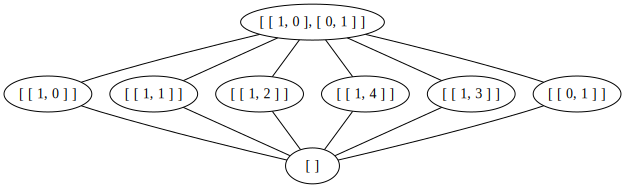

In [8]:
JUPYTER_DotSplash(RelToDotNS(un,h,lab));

## Lattice of divisors of an integer

Yet another example with positive divisors of an integer.

In [9]:
un:=DivisorsInt(60);

[ 1, 2, 3, 4, 5, 6, 10, 12, 15, 20, 30, 60 ]

In [10]:
rels:=Filtered(Cartesian(un,un),p->p[2] mod p[1]=0);

[ [ 1, 1 ], [ 1, 2 ], [ 1, 3 ], [ 1, 4 ], [ 1, 5 ], [ 1, 6 ], [ 1, 10 ], [ 1, 12 ], [ 1, 15 ], [ 1, 20 ], [ 1, 30 ], [ 1, 60 ], [ 2, 2 ], [ 2, 4 ], [ 2, 6 ], [ 2, 10 ], [ 2, 12 ], [ 2, 20 ], [ 2, 30 ], [ 2, 60 ], [ 3, 3 ], [ 3, 6 ], [ 3, 12 ], [ 3, 15 ], [ 3, 30 ], [ 3, 60 ], [ 4, 4 ], [ 4, 12 ], [ 4, 20 ], [ 4, 60 ], [ 5, 5 ], [ 5, 10 ], [ 5, 15 ], [ 5, 20 ], [ 5, 30 ], [ 5, 60 ], [ 6, 6 ], [ 6, 12 ], [ 6, 30 ], [ 6, 60 ], [ 10, 10 ], [ 10, 20 ], [ 10, 30 ], [ 10, 60 ], [ 12, 12 ], [ 12, 60 ], [ 15, 15 ], [ 15, 30 ], [ 15, 60 ], [ 20, 20 ], [ 20, 60 ], [ 30, 30 ], [ 30, 60 ], [ 60, 60 ] ]

In [11]:
h:=hasse(un,rels);

[ [ 1, 2 ], [ 1, 3 ], [ 1, 5 ], [ 2, 4 ], [ 2, 6 ], [ 2, 10 ], [ 3, 6 ], [ 3, 15 ], [ 4, 12 ], [ 4, 20 ], [ 5, 10 ], [ 5, 15 ], [ 6, 12 ], [ 6, 30 ], [ 10, 20 ], [ 10, 30 ], [ 12, 60 ], [ 15, 30 ], [ 20, 60 ], [ 30, 60 ] ]

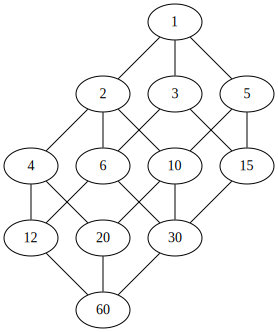

In [12]:
JUPYTER_DotSplash(RelToDotNS(un,h,un));